# `pandas`

*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

**notebook is partially based on https://github.com/ageron/handson-ml2 repo**

# Setup

### Download data

In [ ]:
%pip install gdown 
!gdown --id 1z1TxHd97juldLRPz55SXu4InMwbQhdNL
!gdown --id 1MmyHNbYAi6Y4fwS3f7pJDjMy8S9QWvCQ
!ls -al

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z1TxHd97juldLRPz55SXu4InMwbQhdNL
To: /content/metabolites.csv
100% 1.79M/1.79M [00:00<00:00, 211MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MmyHNbYAi6Y4fwS3f7pJDjMy8S9QWvCQ
To: /content/Data_Cortex_Nuclear.csv
100% 1.01M/1.01M [00:00<00:00, 148MB/s]
total 2764
drwxr-xr-x 1 root root    4096 Dec  7 17:37 .
drwxr-xr-x 1 root root    4096 Dec  7 14:12 ..
drwxr-xr-x 4 root root    4096 Dec  5 14:36 .conf

First, let's import `pandas`. People usually import it as `pd`:

In [ ]:
import pandas as pd

# `Series` - a dict like object
A `Series` object is 1D array, **similar to a column in a spreadsheet** (with a column name and row labels).

## Creating a `Series`
Let's start by creating our first `Series` object!

In [ ]:
data = {
    'alice': 34,
    'bob': 42,
    'charles': 68,
    'darwin': 54
}
data

{'alice': 34, 'bob': 42, 'charles': 68, 'darwin': 54}

Create `Series` from dict

In [ ]:
pd.Series(data)

alice      34
bob        42
charles    68
darwin     54
dtype: int64

A `Series` can have a `name`:

In [ ]:
s = pd.Series(data, name='age')
s

alice      34
bob        42
charles    68
darwin     54
Name: age, dtype: int64

alternatively, we can provide values and index separately

In [ ]:
s2 = pd.Series(
    data=[45, 67, 12, 56],
    index=["alice", "bob", "joey", "ian"],
    name='age'
)
s2

alice    45
bob      67
joey     12
ian      56
Name: age, dtype: int64

## Access data

In [ ]:
s['bob']

42

In [ ]:
s.iloc[-1]

54

In [ ]:
s.iloc[1:3]

bob        42
charles    68
Name: age, dtype: int64

In [ ]:
len(s)

4

## $\color{purple}{\text{Exercise 1}}$
1. Create a Series that contains heights of your friends or family members etc. Data can be fake but should have at least 5 elements. Name the variable `heights`.
2. Print the length of the series.
3. Print all values except the first and the last ones.

[3 min]

In [ ]:
# Your code goes here:

heights = pd.Series(data={
    'Robert': 208,
    'Aaron': 198,
    'Jayson': 205,
    'Jaylen': 198,
    'Daniel': 188,
}, name='height')

print(len(heights))
heights.iloc[1:-1]

5


Aaron     198
Jayson    205
Jaylen    198
Name: height, dtype: int64

## Operations on `Series`

In [ ]:
s

alice      34
bob        42
charles    68
darwin     54
Name: age, dtype: int64

In [ ]:
s + 100

alice      134
bob        142
charles    168
darwin     154
Name: age, dtype: int64

In [ ]:
s / 5

alice       6.8
bob         8.4
charles    13.6
darwin     10.8
Name: age, dtype: float64

In [ ]:
s > 40

alice      False
bob         True
charles     True
darwin      True
Name: age, dtype: bool

In [ ]:
s.astype('str')

alice      34
bob        42
charles    68
darwin     54
Name: age, dtype: object

In [ ]:
s.astype('str') + " years old"

alice      34 years old
bob        42 years old
charles    68 years old
darwin     54 years old
Name: age, dtype: object

In [ ]:
s + s2

alice       79.0
bob        109.0
charles      NaN
darwin       NaN
ian          NaN
joey         NaN
Name: age, dtype: float64

## Statistics

In [ ]:
s.mean()

49.5

In [ ]:
s.std()

14.82115605027714

In [ ]:
s.median()

48.0

In [ ]:
s.sum()

198

In [ ]:
s.prod()

5243616

## Numpy operations

In [ ]:
s ** 2

alice      1156
bob        1764
charles    4624
darwin     2916
Name: age, dtype: int64

In [ ]:
import numpy as np

In [ ]:
np.power(s, 2)

alice      1156
bob        1764
charles    4624
darwin     2916
Name: age, dtype: int64

In [ ]:
np.log(s)

alice      3.526361
bob        3.737670
charles    4.219508
darwin     3.988984
Name: age, dtype: float64

more numpy operations:
https://numpy.org/doc/stable/reference/routines.math.html

## $\color{purple}{\text{Exercise 2}}$

Calculate standard score of the `s` series <br>
https://en.wikipedia.org/wiki/Standard_score#Calculation

*hint: use `.mean()` and `.std()` methods*

[3 min]

In [ ]:
# Your code goes here:
standard_score = ((s - s.mean()) / s.std())
standard_score


alice     -1.045802
bob       -0.506033
charles    1.248216
darwin     0.303620
Name: age, dtype: float64

In [ ]:
assert standard_score.mean() < 10e-5
assert standard_score.std() == 1.0

## $\color{DarkOrange}{\text{Homework 1}}$
Calculate Geometric and Harmonic means of the `s` series. <br>
https://en.wikipedia.org/wiki/Geometric_mean <br>
https://en.wikipedia.org/wiki/Harmonic_mean

[3 min]

In [ ]:
# Your code goes here:
# harmonic_mean = 
# geometric_mean = 

print(f'Harmonic mean: {harmonic_mean:.2f}, Geometric mean: {geometric_mean: .2f}')

In [ ]:
# Test
np.testing.assert_almost_equal(harmonic_mean, 46.2718, decimal=3)
np.testing.assert_almost_equal(geometric_mean, 47.8528, decimal=3)

## Plotting

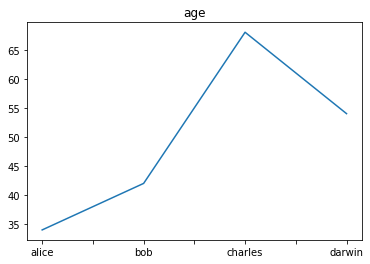

In [ ]:
s.plot(
    title='age'
)

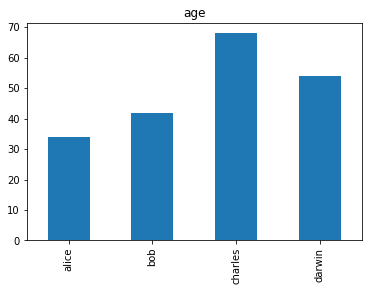

In [ ]:
s.plot(
    title='age',
    kind='bar'
)

## $\color{purple}{\text{Exercise 3}}$

Plot barplot of the `heights` series (from Exercise 1). Add a relevant title.

[2 min]

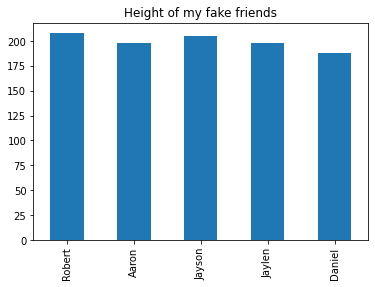

In [ ]:
# Your code goes here:
heights.plot(title='Height of my fake friends', kind='bar')


# `DataFrame`
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`
You can create a DataFrame e.g. by passing a dict of dicts objects (there are many more options):

In [ ]:
people_dict = {
    "weight": {'alice': 68, 'bob': 83, 'charles': 112},
    "birthyear": {'bob': 1984, 'alice': 1985, 'charles': 1994},
    "children": {'charles': 0, 'bob': 3},
    "hobby": {'alice': 'Biking', 'bob': 'Dancing'},
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1994,0.0,NaN


A few things to note:
* the dicts were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `DataFrame`s are displayed nicely in Jupyter notebooks, woohoo!

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [ ]:
people["birthyear"]

alice      1985
bob        1984
charles    1994
Name: birthyear, dtype: int64

You can also get multiple columns at once:

In [ ]:
type(people["birthyear"])

pandas.core.series.Series

In [ ]:
people["birthyear"] - 100

alice      1885
bob        1884
charles    1894
Name: birthyear, dtype: int64

In [ ]:
people["birthyear"].mean()

1987.6666666666667

In [ ]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1994,NaN


## Accessing rows

In [ ]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1994,0.0,NaN


The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [ ]:
charles = people.loc["charles"]
charles

weight        112
birthyear    1994
children      0.0
hobby         NaN
Name: charles, dtype: object

You can also access rows by integer location using the `iloc` attribute:

In [ ]:
people.iloc[0]

weight           68
birthyear      1985
children        NaN
hobby        Biking
Name: alice, dtype: object

You can also get a slice of rows, and this returns a `DataFrame` object:

In [ ]:
people.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1994,0.0,NaN


Finally, you can pass a boolean to get the matching rows:

In [ ]:
people[[True, False, True]]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
charles,112,1994,0.0,NaN


## $\color{purple}{\text{Exercise 4}}$

1. Print only Alice and Bob rows.
2. Print mean weight of the `people`.

[3 min]

In [ ]:
# Your code goes here:
print(people.loc[['alice', 'bob']])
print('Mean weight: ', people['weight'].mean())


       weight  birthyear  children    hobby
alice      68       1985       NaN   Biking
bob        83       1984       3.0  Dancing
Mean weight:  87.66666666666667


## Adding and removing columns

In [ ]:
people["height"] = [172, 181, 185] # adds a new column "height"
people

,weight,birthyear,children,hobby,height
alice,68,1985,NaN,Biking,172
bob,83,1984,3.0,Dancing,181
charles,112,1994,0.0,NaN,185


You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [ ]:
people["age"] = 2022 - people["birthyear"]  # adds a new column "age"
people

,weight,birthyear,children,hobby,height,age
alice,68,1985,NaN,Biking,172,37
bob,83,1984,3.0,Dancing,181,38
charles,112,1994,0.0,NaN,185,28


In [ ]:
people["over 30"] = people["age"] > 30      # adds another column "over 30"
people

,weight,birthyear,children,hobby,height,age,over 30
alice,68,1985,NaN,Biking,172,37,True
bob,83,1984,3.0,Dancing,181,38,True
charles,112,1994,0.0,NaN,185,28,False


In [ ]:
del people["children"]
people

,weight,birthyear,hobby,height,age,over 30
alice,68,1985,Biking,172,37,True
bob,83,1984,Dancing,181,38,True
charles,112,1994,NaN,185,28,False


## Operations

In [ ]:
people * 2

,weight,birthyear,hobby,height,age,over 30
alice,136,3970,BikingBiking,344,74,2
bob,166,3968,DancingDancing,362,76,2
charles,224,3988,NaN,370,56,0


In [ ]:
people.isna()

,weight,birthyear,hobby,height,age,over 30
alice,False,False,False,False,False,False
bob,False,False,False,False,False,False
charles,False,False,True,False,False,False


In [ ]:
people.fillna('No hobby')

,weight,birthyear,hobby,height,age,over 30
alice,68,1985,Biking,172,37,True
bob,83,1984,Dancing,181,38,True
charles,112,1994,No hobby,185,28,False


## $\color{purple}{\text{Exercise 5}}$
Calculate Body Mas Index (BMI) of the `people`. Store this as a column `body_mass_index` in the DataFrame.

https://en.wikipedia.org/wiki/Body_mass_index

[3 min]

In [ ]:
# Your code goes here:
people["body_mass_index"] = people['weight'] / ((people['height']/100) ** 2)
people

,weight,birthyear,hobby,height,age,over 30,body_mass_index
alice,68,1985,Biking,172,37,True,22.985398
bob,83,1984,Dancing,181,38,True,25.335002
charles,112,1994,NaN,185,28,False,32.724617


## Querying a `DataFrame`
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [ ]:
people.query("age > 30 and hobby == 'Biking'")

,weight,birthyear,hobby,height,age,over 30,body_mass_index
alice,68,1985,Biking,172,37,True,22.985398


In [ ]:
people[(people['age'] > 30) & (people['hobby'] == 'Biking')]

,weight,birthyear,hobby,height,age,over 30,body_mass_index
alice,68,1985,Biking,172,37,True,22.985398


In [ ]:
people['age'] > 30

alice       True
bob         True
charles    False
Name: age, dtype: bool

In [ ]:
people['hobby'] == 'Biking'

alice       True
bob        False
charles    False
Name: hobby, dtype: bool

In [ ]:
(people['age'] > 30) & (people['hobby'] == 'Biking')

alice       True
bob        False
charles    False
dtype: bool

## Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [ ]:
people.sort_index(ascending=False)

,weight,birthyear,hobby,height,age,over 30,body_mass_index
charles,112,1994,NaN,185,28,False,32.724617
bob,83,1984,Dancing,181,38,True,25.335002
alice,68,1985,Biking,172,37,True,22.985398


To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [ ]:
people.sort_values(by="age", ascending=True)

,weight,birthyear,hobby,height,age,over 30,body_mass_index
charles,112,1994,NaN,185,28,False,32.724617
alice,68,1985,Biking,172,37,True,22.985398
bob,83,1984,Dancing,181,38,True,25.335002


## $\color{purple}{\text{Exercise 6}}$
Query people higher than 180 [cm] and sort them descending by their BMI

[3 min]

In [ ]:
# Your code goes here:
people.query('height > 180').sort_values('body_mass_index', ascending=False)

,weight,birthyear,hobby,height,age,over 30,body_mass_index
charles,112,1994,NaN,185,28,False,32.724617
bob,83,1984,Dancing,181,38,True,25.335002


## Plotting a `DataFrame`
Just like for `Series`, pandas makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is trivial to create a line plot from a `DataFrame`'s data by calling its `plot` method.

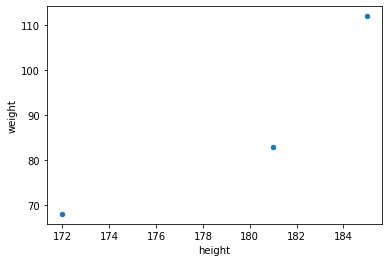

In [ ]:
people.plot(kind="scatter", x="height", y="weight")

## Saving & loading
Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database.

### Saving
Let's save it to CSV, HTML and JSON:

In [ ]:
people.to_csv("people.csv")
people.to_html("people.html")
people.to_json("people.json")

Done! Let's take a peek at what was saved:

In [ ]:
for filename in ("people.csv", "people.html", "people.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# people.csv
,weight,birthyear,hobby,height,age,over 30,body_mass_index
alice,68,1985,Biking,172,37,True,22.985397512168742
bob,83,1984,Dancing,181,38,True,25.33500198406642
charles,112,1994,,185,28,False,32.72461650840029


# people.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>weight</th>
      <th>birthyear</th>
      <th>hobby</th>
      <th>height</th>
      <th>age</th>
      <th>over 30</th>
      <th>body_mass_index</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>68</td>
      <td>1985</td>
      <td>Biking</td>
      <td>172</td>
      <td>37</td>
      <td>True</td>
      <td>22.985398</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>83</td>
      <td>1984</td>
      <td>Dancing</td>
      <td>181</td>
      <td>38</td>
      <td>True</td>
      <td>25.335002</td>
    </tr>
    <tr>
      <th>charles</th>
      <td>112</td>
      <td>1994</td>
      <td>NaN</td>
      <td>185</

Note that the index is saved as the first column (with no name) in a CSV file, as `<th>` tags in HTML and as keys in JSON.

Saving to other formats works very similarly, but some formats require extra libraries to be installed. For example, saving to Excel requires the openpyxl library:

In [ ]:
# %pip install openpyxl
try:
    people.to_excel("people.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

### Loading
Now let's load our CSV file back into a `DataFrame`:

In [ ]:
people_loaded = pd.read_csv("people.csv", index_col=0)
people_loaded

,weight,birthyear,hobby,height,age,over 30,body_mass_index
alice,68,1985,Biking,172,37,True,22.985398
bob,83,1984,Dancing,181,38,True,25.335002
charles,112,1994,NaN,185,28,False,32.724617


# Exploring "Mice Protein Expression" dataset
source: 
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

https://www.kaggle.com/ruslankl/mice-protein-expression/version/1

*"The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. The dataset contains a total of 1080 measurements per protein. Each measurement was considered as an independent sample/mouse.*

*The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not."*

Columns in the data:
- [0] Mouse ID
- [1:77] Values of expression levels of 77 proteins; the names of proteins are followed by N indicating that they were measured in the nuclear fraction. For example: DYRK1A_n
- [78] Genotype: control (c) or trisomy (t)
- [79] Treatment type: memantine (m) or saline (s)
- [80] Behavior: context-shock (CS) or shock-context (SC)
- [81] Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

~ https://www.kaggle.com/ruslankl/protein-expression-analysis/report

original article by Clara Higuera, Katheleen J. Gardiner and Krzysztof J. Cios [Article Link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0129126).

In [ ]:
data = pd.read_csv('Data_Cortex_Nuclear.csv', index_col=0)

In [ ]:
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [ ]:
data.shape

(1080, 81)

In [ ]:
data.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [ ]:
data['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [ ]:
data['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [ ]:
data.groupby('Genotype')['Treatment'].value_counts().unstack()

Treatment,Memantine,Saline
Genotype,,
Control,300,270
Ts65Dn,270,240


## Plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### `DYRK1A_N` expression levels in mice

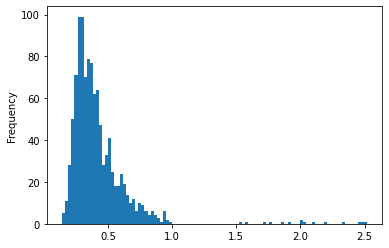

In [ ]:
data['DYRK1A_N'].plot(kind='hist', bins=100)

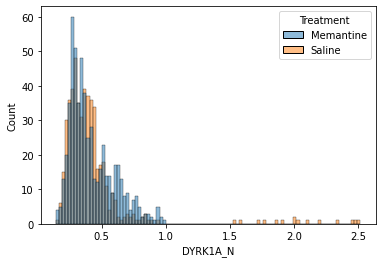

In [ ]:
sns.histplot(data=data, x='DYRK1A_N', hue='Treatment', bins=100)

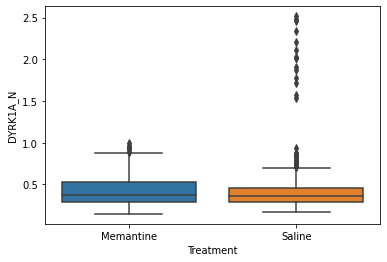

In [ ]:
sns.boxplot(data=data, y='DYRK1A_N', x='Treatment')

### Expression levels' Heatmap

In [ ]:
data.filter(like='_N')

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825


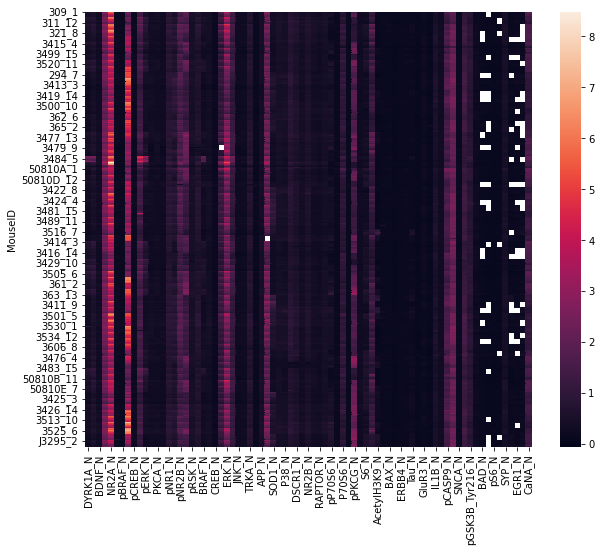

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(data.filter(like='_N'))

### Correlation of expression levels

In [ ]:
corr = data.corr(method='pearson').abs()
corr.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.959512,0.359433,0.294526,0.325063,0.180959,0.093737,0.180169,0.047299,0.791173,...,0.199363,0.253175,0.167358,0.326577,0.228488,0.047246,0.384816,0.323397,0.473734,0.476033
ITSN1_N,0.959512,1.000000,0.459884,0.422492,0.426182,0.147775,0.076507,0.132870,0.171122,0.780926,...,0.200833,0.327136,0.257745,0.256573,0.309593,0.042422,0.347339,0.399856,0.511433,0.517782
BDNF_N,0.359433,0.459884,1.000000,0.805784,0.749993,0.317537,0.390530,0.246760,0.603857,0.451598,...,0.080776,0.186508,0.146526,0.127703,0.254218,0.450433,0.135637,0.239907,0.244732,0.262578
NR1_N,0.294526,0.422492,0.805784,1.000000,0.873889,0.211540,0.244224,0.301151,0.597443,0.416629,...,0.141423,0.386577,0.321790,0.264181,0.374932,0.473366,0.234171,0.319672,0.351958,0.205463
NR2A_N,0.325063,0.426182,0.749993,0.873889,1.000000,0.110172,0.111143,0.280733,0.392695,0.409502,...,0.259166,0.449268,0.297453,0.262492,0.434530,0.400526,0.314210,0.346987,0.454366,0.187292


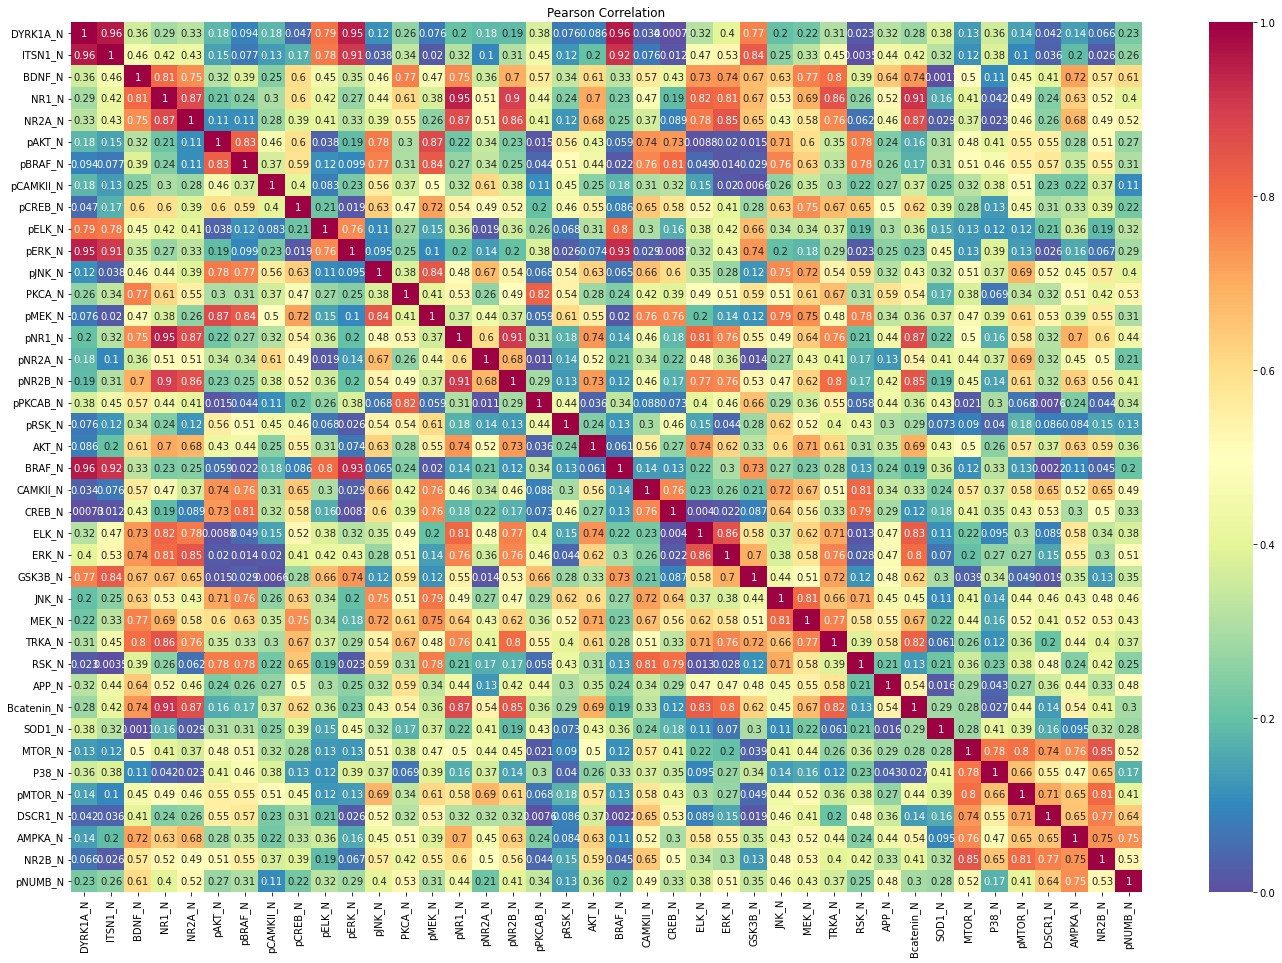

In [ ]:
fig = plt.figure(figsize=(24,16))
sns.heatmap(
    data=corr.iloc[:40, :40],
    annot=True,
    cmap='Spectral_r',
    vmin=0,
    vmax=1
)
plt.title('Pearson Correlation')
plt.show()

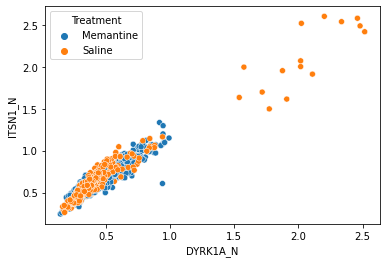

In [ ]:
sns.scatterplot(data=data, x='DYRK1A_N', y='ITSN1_N', hue='Treatment')

## $\color{purple}{\text{Exercise 7}}$

1. Load data from the `metabolites.csv` file
2. Print the shape of the dataframe
3. Plot boxplot showing `C01996_Acetylcholine` level grouped by `Group` or `Gender` columns.
4. Plot heatmap of all metabolites (*hint: in this case, you can get metabolites by filtering the dataframe with `.filter(like='C')`*)

Source of the data: *Yachida S, Mizutani S, Shiroma H, et al. Metagenomic and metabolomic analyses reveal distinct stage-specific phenotypes of the gut microbiota in colorectal cancer. Nat Med. 2019;25(6):968-976. doi:10.1038/s41591-019-0458-7*

[5 min]

In [ ]:
# Your code goes here